In [43]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0 = malignant, 1 = benign

print(X.shape, y.shape)

(569, 30) (569,)


In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [45]:
missing_value = X.isnull().sum()
missing_value

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [46]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [47]:
from pandas import value_counts
value_counts(y)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19904\1314566096.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  value_counts(y)


1    357
0    212
Name: count, dtype: int64

<Axes: ylabel='count'>

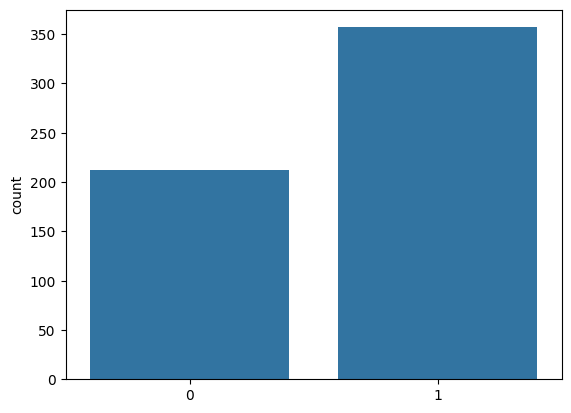

In [48]:
import seaborn as sns
sns.countplot(x=y)

<Axes: >

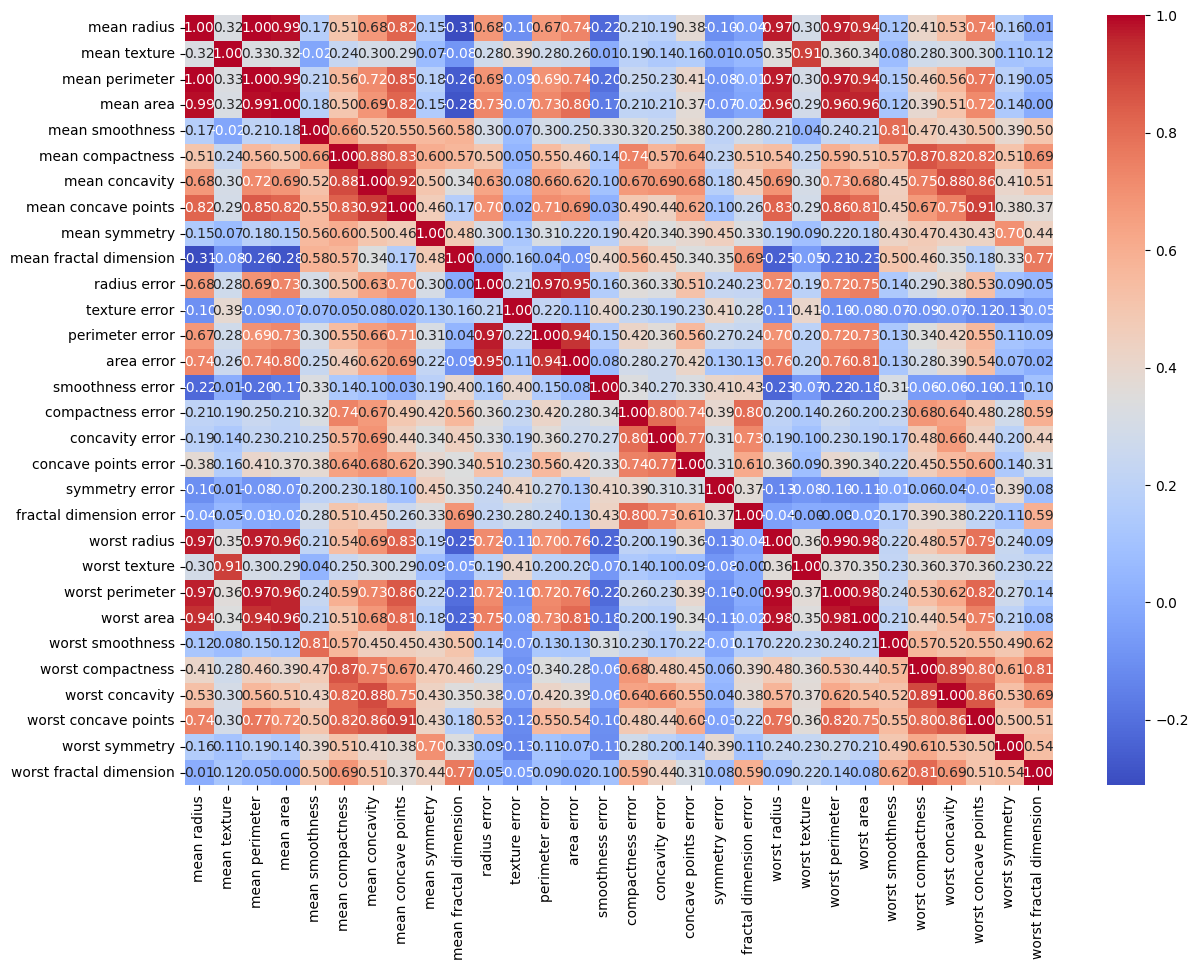

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [50]:
from feature_engine.selection import DropCorrelatedFeatures

drop_corr = DropCorrelatedFeatures(threshold=0.85)

X = drop_corr.fit_transform(X)

print(drop_corr.features_to_drop_)
print(len(drop_corr.features_to_drop_))

['perimeter error', 'radius error', 'mean perimeter', 'mean radius', 'worst area', 'worst perimeter', 'worst radius', 'mean concavity', 'worst compactness', 'worst concave points', 'worst texture']
11


<Axes: >

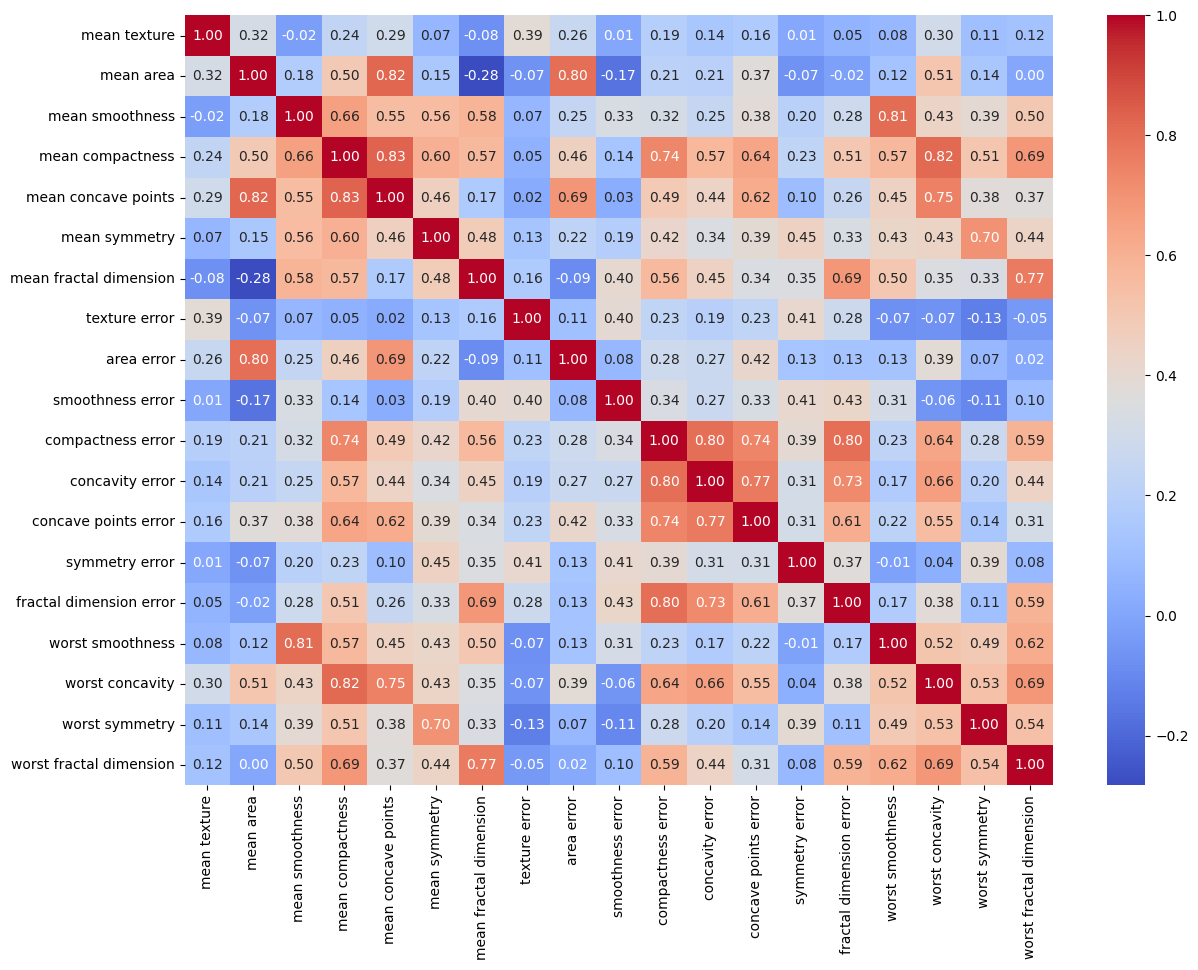

In [51]:
plt.figure(figsize=(14,10))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm')

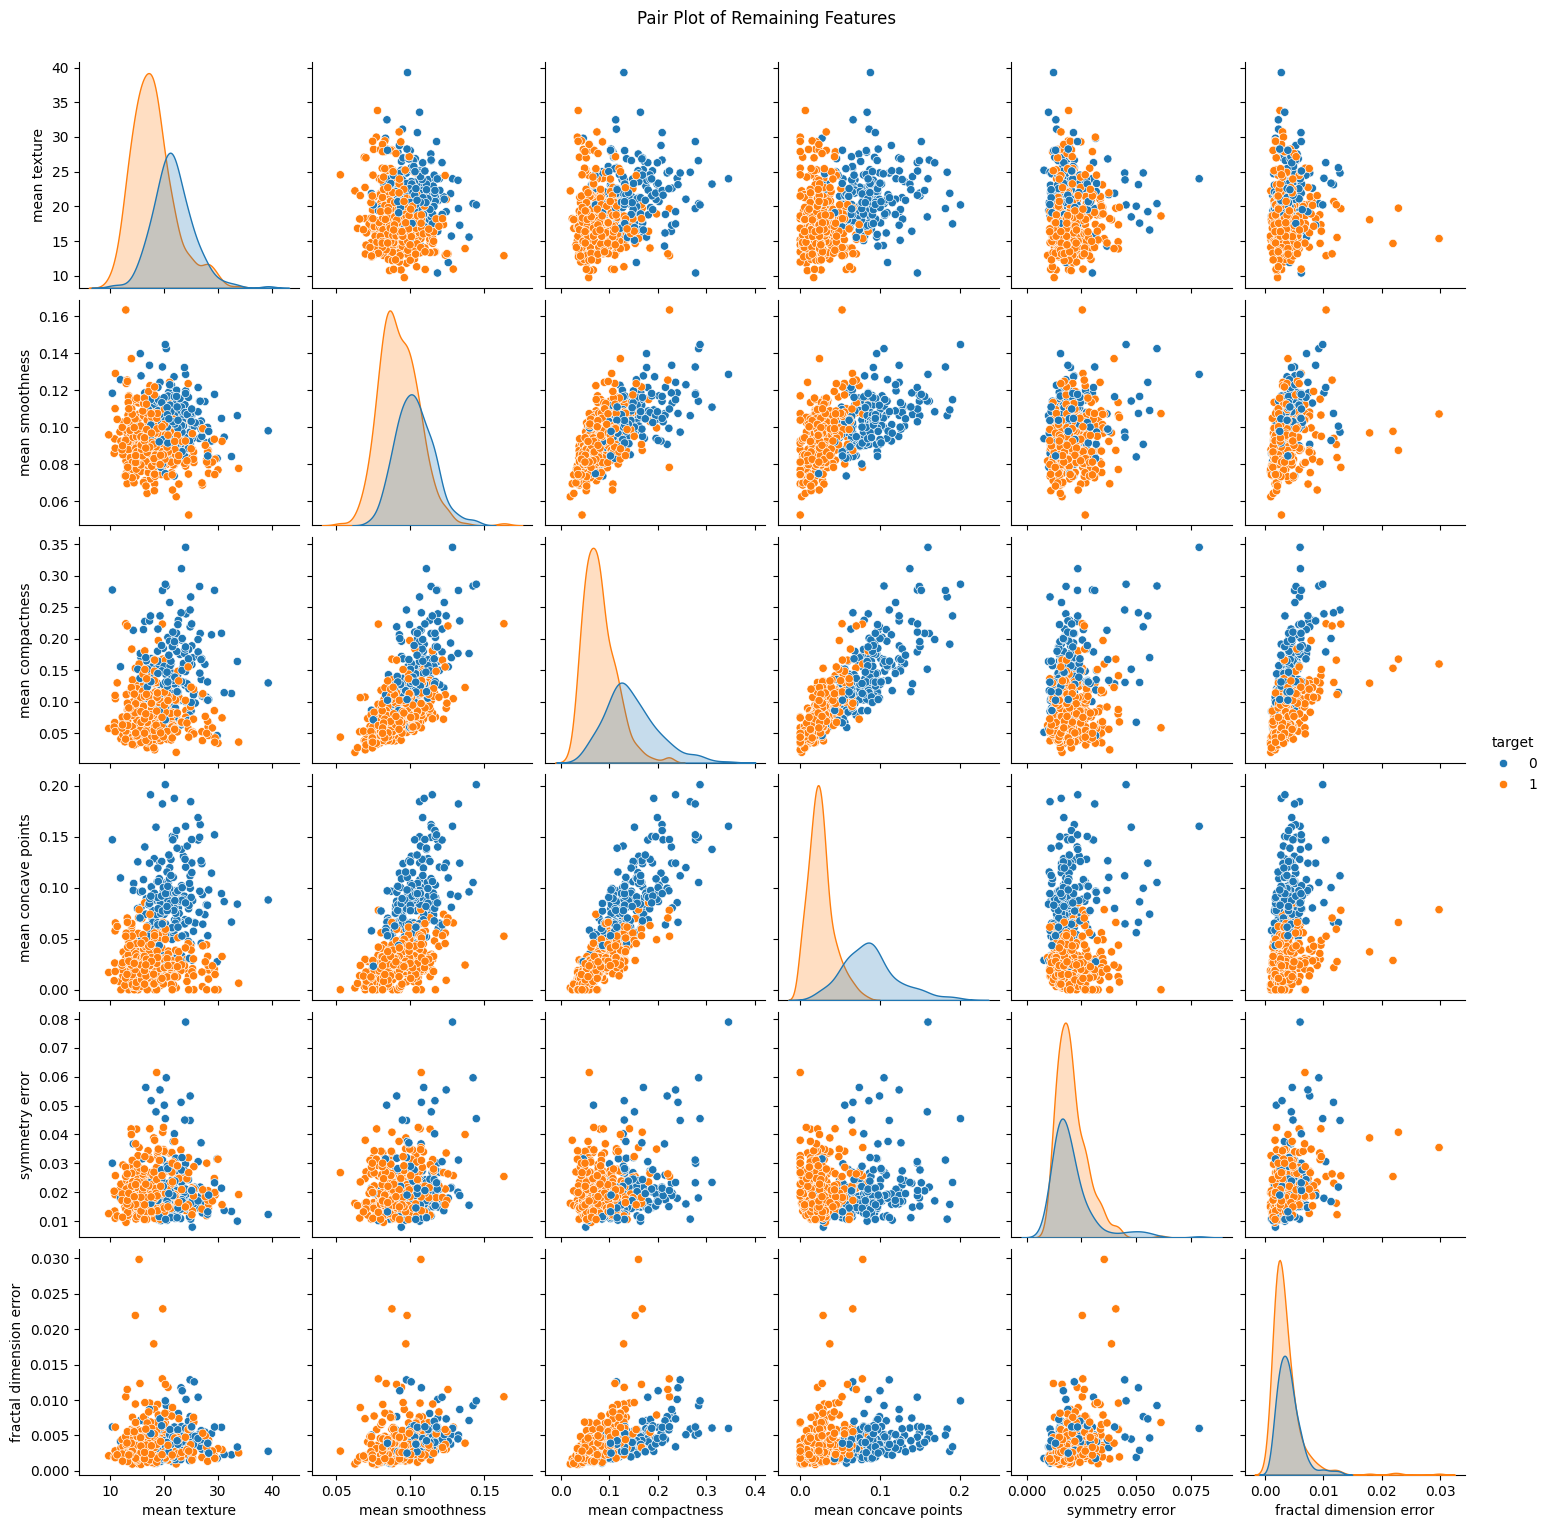

In [52]:
remaining_features = ['mean texture', 'mean smoothness', 'mean compactness', 
                      'mean concave points', 'symmetry error', 'fractal dimension error']

X_with_target = X.copy()
X_with_target['target'] =y

sns.pairplot(X_with_target[remaining_features +[ "target"]], hue='target', diag_kind='kde')
plt.suptitle("Pair Plot of Remaining Features", y=1.02)
plt.savefig("test")
plt.show()

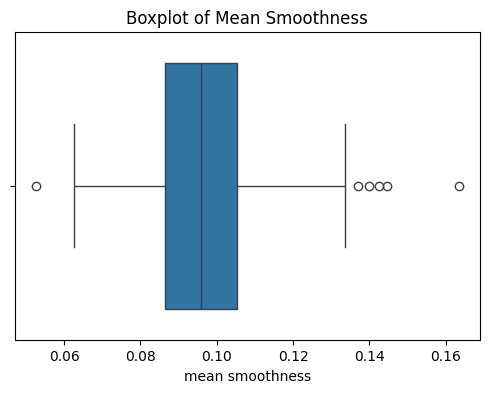

In [53]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=X['mean smoothness'])
plt.title("Boxplot of Mean Smoothness")
plt.show()

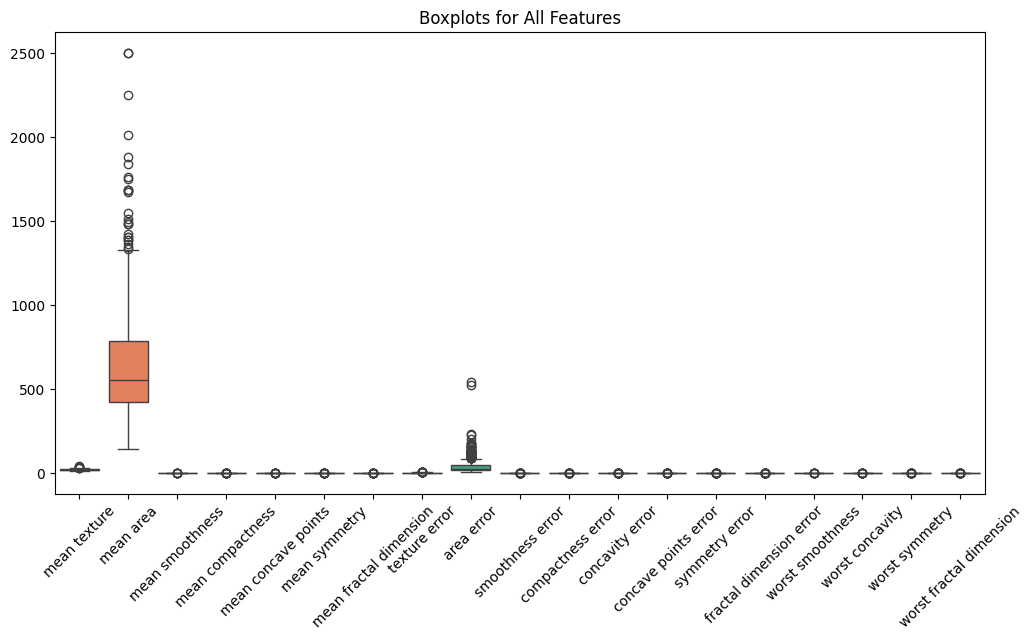

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.title("Boxplots for All Features")
plt.show()

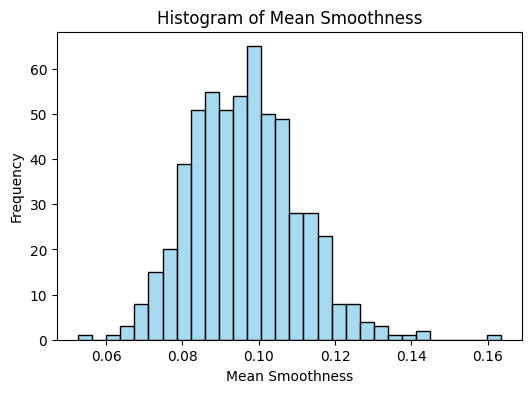

In [55]:
plt.figure(figsize=(6, 4))
sns.histplot(X['mean smoothness'], bins=30, kde=False, color='skyblue')
plt.title("Histogram of Mean Smoothness")
plt.xlabel("Mean Smoothness")
plt.ylabel("Frequency")
plt.show()

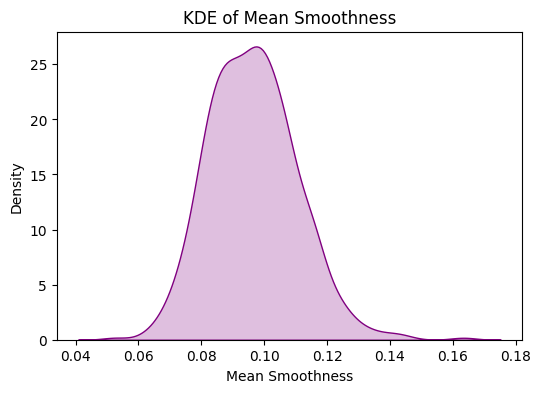

In [56]:
plt.figure(figsize=(6, 4))
sns.kdeplot(X['mean smoothness'], fill=True, color='purple')
plt.title("KDE of Mean Smoothness")
plt.xlabel("Mean Smoothness")
plt.show()

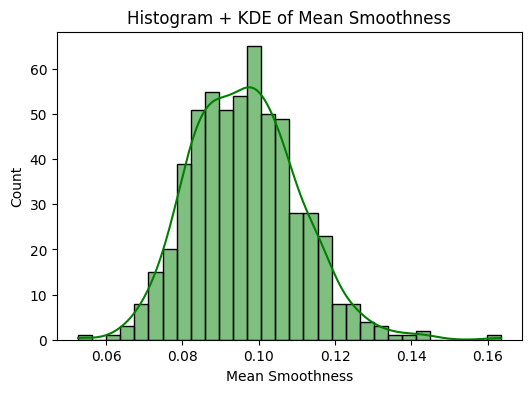

In [57]:
plt.figure(figsize=(6, 4))
sns.histplot(X['mean smoothness'], bins=30, kde=True, color='green')
plt.title("Histogram + KDE of Mean Smoothness")
plt.xlabel("Mean Smoothness")
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression())
])

In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "log_reg__C": [0.01, 0.1, 1, 10, 100],
    "log_reg__penalty": ["l1", "l2"],
    "log_reg__solver": ["liblinear", "lbfgs"]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [61]:
grid_search.fit(X_train, y_train)

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\AppData\Roaming\Python\Python312\s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_reg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.01, 0.1, 1, 10, 100],
                         'log_reg__penalty': ['l1', 'l2'],
                         'log_reg__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [62]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'log_reg__C': 1, 'log_reg__penalty': 'l1', 'log_reg__solver': 'liblinear'}
Best Score: 0.9824175824175825


In [63]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9824561403508771


### Softmax Regression

In [64]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target  # 0, 1, 2 for 3 classes

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [66]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [71]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "log_reg__C": [0.01, 0.1, 1, 10, 100],
    "log_reg__penalty": ["l2"],
    "log_reg__solver": [ "lbfgs"],
    "log_reg__multi_class": ["multinomial"]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [81]:
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'log_reg__C': 1, 'log_reg__multi_class': 'multinomial', 'log_reg__penalty': 'l2', 'log_reg__solver': 'lbfgs'}
Best Score: 0.9583333333333334


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [82]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 1.0
